In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

#you can comment the next 2 lines if you already have the .py file with the same file name
# import gdown
# gdown.download(url='https://drive.google.com/uc?id=19gKt2-Ad4ZutTu2JUZZm802RzVPAv-8T', output='B22CS090_myLDA.py')

#importing the .py file to use required functions
import B22CS090_myLDA

<h2><b>Question 1: LDA</b></h2>

[1000 1000]


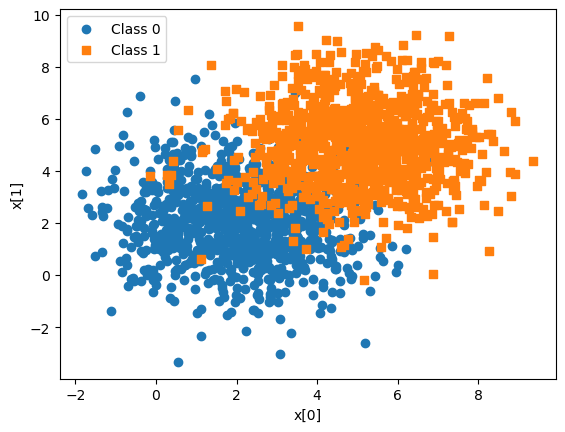

In [26]:
#loading data from sir's github link
data = np.loadtxt('https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA-4/data.csv', delimiter=',')
x, y = data[:, :2], data[:, 2].astype(int)

#performing 80-20 splitting of dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, shuffle=True, random_state=123)

print(np.bincount(y))

plt.scatter(x[y == 0, 0], x[y == 0, 1], label = 'Class 0', marker='o')
plt.scatter(x[y == 1, 0], x[y == 1, 1], label = 'Class 1', marker='s')
plt.legend()
plt.xlabel('x[0]')
plt.ylabel('x[1]')
# plt.savefig('all_data_scatter.png')
plt.show()

<h4>Switch cases are implemented in myLDA.py as given in the template. I am just calling the necessary functions over here to get the required matrices</h4>

In [27]:
X = np.empty(shape=(len(x_train), 3))
X[:, :2] = x_train
X[:, 2] = y_train

#using the functions from myLDA to calculate necessary matrices
meanDiff = B22CS090_myLDA.ComputeMeanDiff(X)
Sw = B22CS090_myLDA.ComputeSW(X)
Sb = B22CS090_myLDA.ComputeSB(X)
w = B22CS090_myLDA.GetLDAProjectionVector(X)


print(f'Mean difference: \n{meanDiff}\n')
print(f'Within class Scatter matrix: \n{Sw}\n')
print(f'Between class Scatter matrix: \n{Sb}\n')
print(f'Projection vector: \n{w}')

Mean difference: 
[[-3.02497273 -3.02879727]]

Within class Scatter matrix: 
[[3514.44729897 -195.81656663]
 [-195.81656663 3633.79324678]]

Between class Scatter matrix: 
[[9.15046003 9.16202916]
 [9.16202916 9.17361291]]

Projection vector: 
[[0.71781551]
 [0.69623336]]


In [4]:
#Transforming the data into the LDA axis
x_train_lda = x_train.dot(w)
x_test_lda = x_test.dot(w)
print(x_train_lda)

[[2.55358394]
 [6.86965256]
 [8.00149885]
 ...
 [6.79875828]
 [5.90128365]
 [5.4225842 ]]


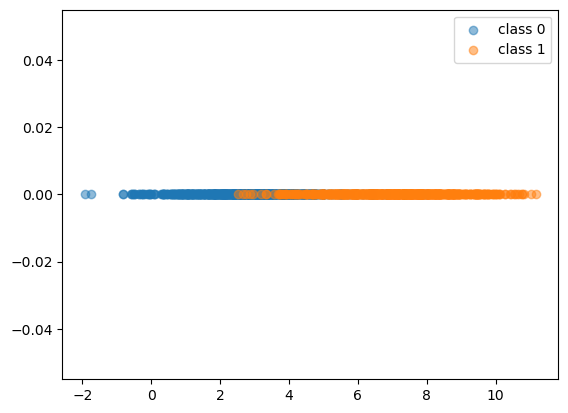

In [5]:
#plotting training samples after transforming
plt.scatter(x_train_lda[y_train == 0], np.zeros_like(x_train_lda[y_train == 0]), label='class 0', marker='o', alpha=0.5)
plt.scatter(x_train_lda[y_train == 1], np.zeros_like(x_train_lda[y_train == 1]), label='class 1', marker='o', alpha=0.5)
plt.legend()
# plt.savefig('lda_training.png')
plt.show()

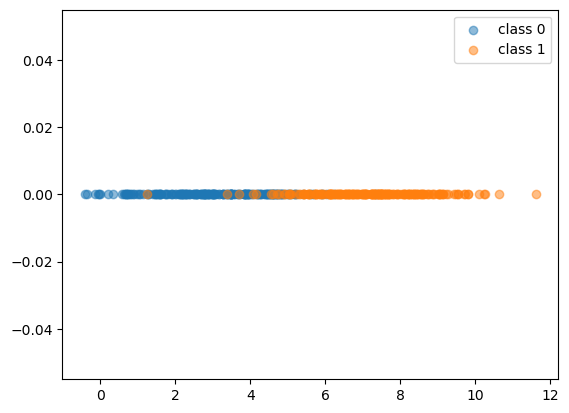

In [6]:
#plotting testing samples after transforming
plt.scatter(x_test_lda[y_test == 0], np.zeros_like(x_test_lda[y_test == 0]), label='class 0', marker='o', alpha=0.5)
plt.scatter(x_test_lda[y_test == 1], np.zeros_like(x_test_lda[y_test == 1]), label='class 1', marker='o', alpha=0.5)
plt.legend()
# plt.savefig('lda_testing.png')
plt.show()

<h3><b>Task 2</b></h3>

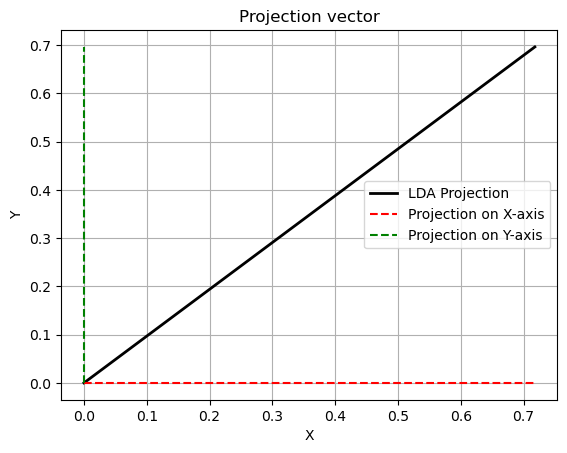

In [7]:
#plotting projection vector and its corresponding projections in the x and y axes
plt.plot([0, w[0][0]], [0, w[1][0]], color='black', linewidth=2, label = 'LDA Projection')

x_projection = [0, w[0][0]]
y_projection = [0, 0]

x_projection_y = [0, 0]
y_projection_y = [0, w[1][0]]

plt.plot(x_projection, y_projection, 'r--', label = 'Projection on X-axis')
plt.plot(x_projection_y, y_projection_y, 'g--', label = 'Projection on Y-axis')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Projection vector')
plt.grid(True)
plt.legend(loc='best')
# plt.savefig('projection_vector.png')
plt.show()

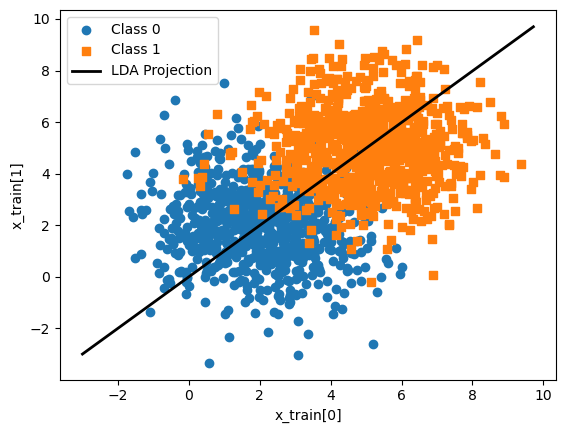

In [8]:
#plotting projection vector along with training samples
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], label = 'Class 0', marker='o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], label = 'Class 1', marker='s')
plt.plot([-3, w[0][0]+9], [-3, w[1][0]+9], color='black', linewidth=2, label='LDA Projection')
plt.legend()
plt.xlabel('x_train[0]')
plt.ylabel('x_train[1]')
# plt.savefig('training_projection_scatter.png')
plt.show()

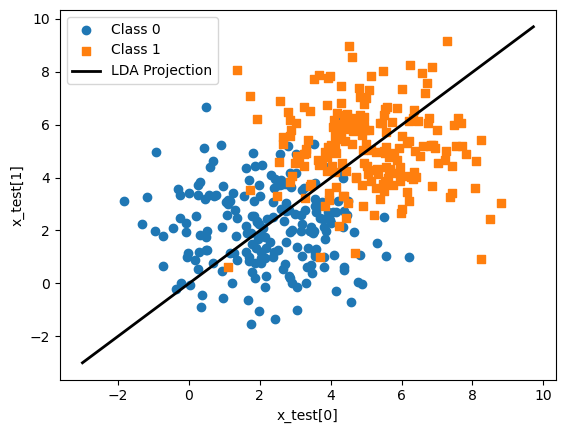

In [9]:
#plotting projection vector along with testing samples
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], label = 'Class 0', marker='o')
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], label = 'Class 1', marker='s')
plt.plot([-3, w[0][0]+9], [-3, w[1][0]+9], color='black', linewidth=2, label='LDA Projection')
plt.legend()
plt.xlabel('x_test[0]')
plt.ylabel('x_test[1]')
# plt.savefig('testing_projection_scatter.png')
plt.show()

<h3><b>Task 3</b></h3>

In [10]:
#getting accuracies on original and projected data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
print(f'Original data training accuracy: {knn.score(x_train, y_train)}')
print(f'Original data test accuracy: {knn.score(x_test, y_test)}')
y_pred_original = knn.predict(x_test)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_lda, y_train)
print(f'Projected data training accuracy: {knn.score(x_train_lda, y_train)}')
print(f'Projected data test accuracy: {knn.score(x_test_lda, y_test)}')
y_pred_lda = knn.predict(x_test_lda)

Original data training accuracy: 1.0
Original data test accuracy: 0.875
Projected data training accuracy: 1.0
Projected data test accuracy: 0.87


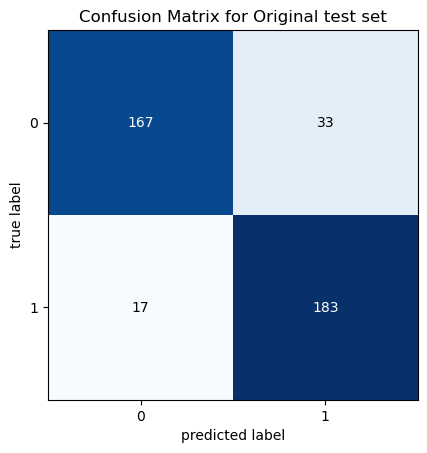

In [11]:
#plotting confusion matrix for original test set
cm = confusion_matrix(y_target=y_test, y_predicted=y_pred_original)
plot_confusion_matrix(cm)
plt.title('Confusion Matrix for Original test set')
# plt.savefig('conf_mat_test_original.png')
plt.show()

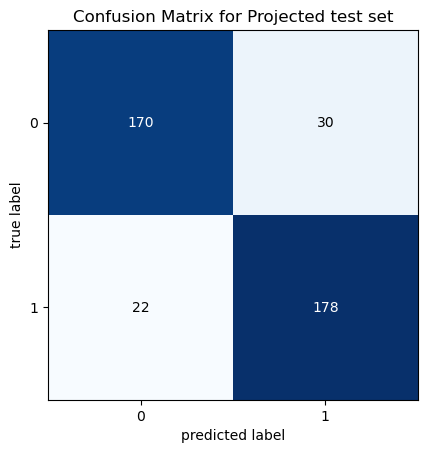

In [12]:
#plotting confusion matrix for projected test set
cm = confusion_matrix(y_target=y_test, y_predicted=y_pred_lda)
plot_confusion_matrix(cm)
plt.title('Confusion Matrix for Projected test set')
# plt.savefig('conf_mat_test_projected.png')
plt.show()

<h2><b>Question 2: Naive Bayes Classifier</b></h2>

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA-4/naive_bayes.csv')
df

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


<h3><b>Task 0</b></h3>

In [14]:
x = df.drop(columns=['Play'])

#mapping 'yes' to 1 and 'no' to 0 for my ease
y = df['Play'].map({'yes': 1,
                    'no': 0})

#splitting randomly with 2 samples in test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=2, stratify=y, shuffle=True, random_state=3)
pd.concat([x_train, y_train], axis=1)

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,0
2,Overcast,Hot,High,f,1
13,Sunny,Mild,High,t,0
1,Rainy,Hot,High,t,0
9,Sunny,Mild,Normal,f,1
6,Overcast,Cool,Normal,t,1
10,Rainy,Mild,Normal,t,1
7,Rainy,Mild,High,f,0
3,Sunny,Mild,High,f,1
4,Sunny,Cool,Normal,f,1


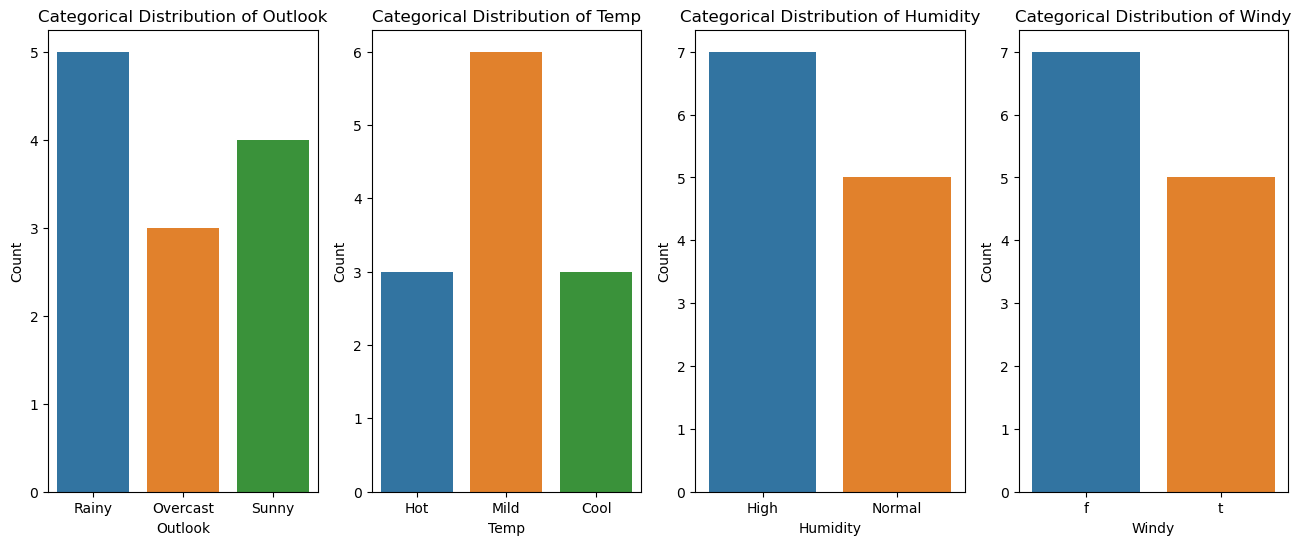

In [15]:
#plotting categorical distribution in training set
plt.figure(figsize=(16, 6))
for i, column in enumerate(x_train.columns):
    plt.subplot(1, 4, i+1)
    sns.countplot(x=column, data=x_train)
    plt.title(f'Categorical Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

# plt.savefig('categorical_distn_training.png')
plt.show()

<h4><b>Task 1: calc_prior()<br>
Task 2: calc_likelihood()<br>
Task 3: predict()<br>
Task 4: predict()<br>
Task 5: Done by entering alpha and K as arguments<br>
</b></h4>

In [16]:
#class to perform operations related to Naive Bayes Classification
class NaiveBayesClassifier:
    def __init__(self, alpha=0, K=0):
        #alpha and K are parameters related to Laplace smoothing
        self.alpha = alpha
        self.K = K
        self.prior = []
        self.likelihood = {}
        self.labels = None


    #calculates prior probabilities
    def calc_prior(self, *, y):
        self.labels = sorted(y.unique())
        # self.prior = []
        for label in self.labels:
            prob = len(y[y == label]) / len(y)
            self.prior.append(prob)
    
        return self.prior
    
    
    #calculates likelihoods
    def calc_likelihood(self, *, x, y):
        features = list(x.columns)

        for feature in features:
            if not(feature in self.likelihood):
                self.likelihood[feature] = {}

            unique_vals = x[feature].unique()

            for val in unique_vals:
                if not(val in self.likelihood[feature]):
                    self.likelihood[feature][val] = []

                for label in self.labels:
                    x_sub = x[y == label]
                    prob = (len(x_sub[x_sub[feature] == val]) + self.alpha) / (len(x_sub) + self.alpha * self.K)

                    self.likelihood[feature][val].append(prob)

        return self.likelihood
    

    #calculates posterior probabilities and predictions
    def predict(self, x):
        preds = []
        post_prob_all = []
        column_dict = {i: col for i, col in enumerate(x.columns)}

        for row in x.values:
            post_prob = []

            for label in self.labels:
                temp = self.prior[label]
                for i, val in enumerate(row):
                    temp = temp * self.likelihood[column_dict[i]][val][label]
        
                post_prob.append(temp)

            post_prob_all.append(post_prob)    
            preds.append(np.argmax(post_prob))

        return preds, post_prob_all

In [17]:
nb = NaiveBayesClassifier()
prior = nb.calc_prior(y=y_train)
likelihood = nb.calc_likelihood(x=x_train, y=y_train)

In [18]:
print(prior)
likelihood

[0.3333333333333333, 0.6666666666666666]


{'Outlook': {'Rainy': [0.75, 0.25],
  'Overcast': [0.0, 0.375],
  'Sunny': [0.25, 0.375]},
 'Temp': {'Hot': [0.5, 0.125], 'Mild': [0.5, 0.5], 'Cool': [0.0, 0.375]},
 'Humidity': {'High': [1.0, 0.375], 'Normal': [0.0, 0.625]},
 'Windy': {'f': [0.5, 0.625], 't': [0.5, 0.375]}}

In [19]:
y_train_preds, train_post_prob = nb.predict(x_train)
print(y_train_preds)
np.round(np.array(train_post_prob), 5)

[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]


array([[0.0625 , 0.00488],
       [0.     , 0.00732],
       [0.02083, 0.01758],
       [0.0625 , 0.00293],
       [0.     , 0.04883],
       [0.     , 0.02197],
       [0.     , 0.01953],
       [0.0625 , 0.01953],
       [0.02083, 0.0293 ],
       [0.     , 0.03662],
       [0.     , 0.02441],
       [0.     , 0.01758]])

In [20]:
y_test_preds, test_post_prob = nb.predict(x_test)
print(y_test_preds)
np.round(np.array(test_post_prob), 5)

[1, 1]


array([[0.     , 0.01221],
       [0.     , 0.02197]])

In [21]:
#using Laplace smoothing
nb = NaiveBayesClassifier(alpha=1, K=4)
prior = nb.calc_prior(y=y_train)
likelihood = nb.calc_likelihood(x=x_train, y=y_train)

In [22]:
print(prior)
likelihood

[0.3333333333333333, 0.6666666666666666]


{'Outlook': {'Rainy': [0.5, 0.25],
  'Overcast': [0.125, 0.3333333333333333],
  'Sunny': [0.25, 0.3333333333333333]},
 'Temp': {'Hot': [0.375, 0.16666666666666666],
  'Mild': [0.375, 0.4166666666666667],
  'Cool': [0.125, 0.3333333333333333]},
 'Humidity': {'High': [0.625, 0.3333333333333333], 'Normal': [0.125, 0.5]},
 'Windy': {'f': [0.375, 0.5], 't': [0.375, 0.3333333333333333]}}

In [23]:
y_train_preds, train_post_prob = nb.predict(x_train)
print(y_train_preds)
np.round(np.array(train_post_prob), 5)

[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]


array([[0.01465, 0.00463],
       [0.00366, 0.00617],
       [0.00732, 0.01029],
       [0.01465, 0.00309],
       [0.00146, 0.02315],
       [0.00024, 0.01235],
       [0.00293, 0.01157],
       [0.01465, 0.01157],
       [0.00732, 0.01543],
       [0.00049, 0.01852],
       [0.00098, 0.01389],
       [0.00366, 0.01029]])

In [24]:
y_test_preds, test_post_prob = nb.predict(x_test)
print(y_test_preds)
np.round(np.array(test_post_prob), 5)

[1, 1]


array([[0.00073, 0.00926],
       [0.00049, 0.01235]])